In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db= mysql.connector.connect(host="localhost",
                            username="root",
                            password="122529",
                            database="ecommerce")

cur=db.cursor()
                            
                            

# list all unique cities where customers live

In [3]:
query="""select distinct(customer_city) from customers"""
cur.execute(query)
data=cur.fetchall()
df= pd.DataFrame(data)
df.head()


,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# count the number of orders placed in 2017

In [5]:
query="""select count(order_id) from orders where year(order_purchase_timestamp)=2017"""
cur.execute(query)
data=cur.fetchall()
"total orders placed in 2017",data[0][0]


('total orders placed in 2017', 45101)

# find the total sales per category

In [9]:
query="""select upper(products.product_category) category,round(sum(payments.payment_value),2) sales 
from products join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id=order_items.order_id
group by category"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=["category","sales"])
df


,category,sales
0,PERFUMERY,1520215.98
1,FURNITURE DECORATION,4290529.18
2,TELEPHONY,1460646.15
3,BED TABLE BATH,5137661.01
4,AUTOMOTIVE,2556882.99
...,...,...
69,CDS MUSIC DVDS,3598.29
70,LA CUISINE,8740.59
71,FASHION CHILDREN'S CLOTHING,2357.01
72,PC GAMER,6523.29


# calculate the percentage of orders that were paid in installments

In [10]:
query="""select (sum(case when payment_installments >=1 then 1
else 0 end))/count(*)*100 from payments"""
cur.execute(query)
data=cur.fetchall()
data

[(Decimal('99.9981'),)]

# count the number of customers from each state

<function matplotlib.pyplot.show(close=None, block=None)>

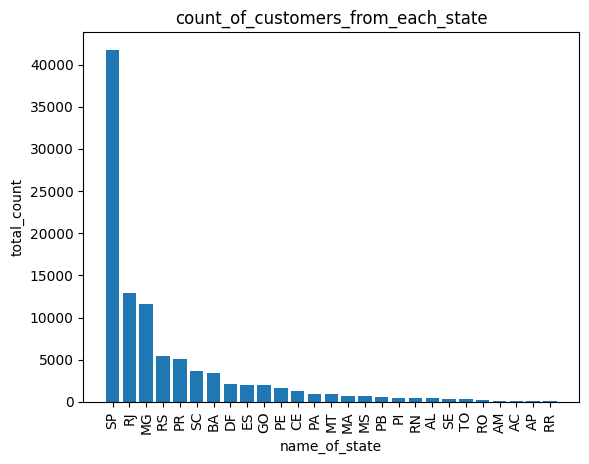

In [26]:
query="""select customer_state, count(customer_id) from customers group by customer_state"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["name_of_state","total_count"])
df=df.sort_values(by="total_count",ascending=False)

#plt.figure(figsize=(5,9,4))
plt.bar(df["name_of_state"],df["total_count"])
plt.xticks(rotation=90)
plt.xlabel("name_of_state")
plt.ylabel("total_count")
plt.title("count_of_customers_from_each_state")

plt.show

# calculate the no of orders per month in 2018

<function matplotlib.pyplot.show(close=None, block=None)>

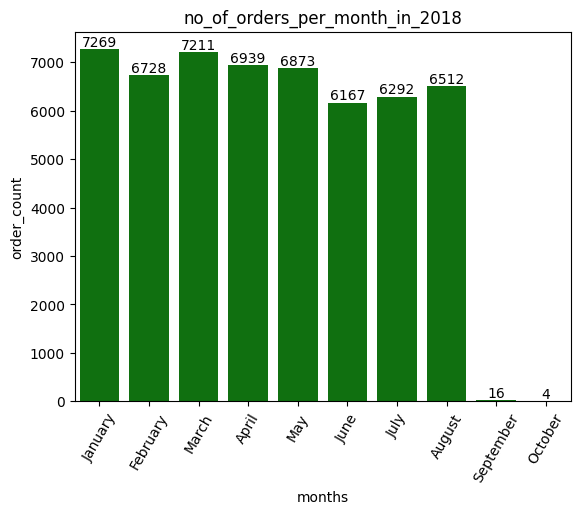

In [30]:
query="""select monthname(order_purchase_timestamp) months, count(order_id)
from orders where year(order_purchase_timestamp)=2018
group by months"""

cur.execute(query)
data=cur.fetchall()
df= pd.DataFrame(data, columns=["months","order_count"])
df
o=["January","February","March","April","May","June","July","August","September","October"]
x=sns.barplot(x=df["months"],y=df["order_count"], data= df, order=o, color="green")
plt.xticks(rotation=60)
x.bar_label(x.containers[0])
plt.title("no_of_orders_per_month_in_2018")
plt.show


# find the average number of products per order, grouped by customer city

In [36]:
query="""with count_per_order as
(select orders.order_id,orders.customer_id,
count(order_items.order_id) oc 
from orders join order_items
on orders.order_id=order_items.order_id
group by orders.order_id,orders.customer_id)
select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from
customers join count_per_order
on customers.customer_id= count_per_order.customer_id
group by  customers.customer_city order by average_orders desc

"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=["customer_city","avg_order"])
df.head(10)


,customer_city,avg_order
0,padre carvalho,7.00
1,celso ramos,6.50
2,candido godoi,6.00
3,datas,6.00
4,matias olimpio,5.00
5,morro de sao paulo,4.00
6,cidelandia,4.00
7,picarra,4.00
8,teixeira soares,4.00
9,curralinho,4.00


# calculate the percentage of total revenue contributed by each product catagory

In [41]:
query ="""select upper(products.product_category) category,round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales 
from products join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id=order_items.order_id
group by category order by sales desc;
 """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["catagory","percentage_of_revenue_generated"])
df.head(10)

,catagory,percentage_of_revenue_generated
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
5,SPORT LEISURE,8.70
6,HOUSEWARES,6.84
7,AUTOMOTIVE,5.32
8,GARDEN TOOLS,5.24
9,COOL STUFF,4.87


# identify the correlation between product price and the number of times a product has been purchased

In [54]:

query="""select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items 
on products.product_id=order_items.product_id
group by products.product_category;
 """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=["product_category","no_of_products_ordered","avg_price"])
arr1=df["no_of_products_ordered"]
arr2=df["avg_price"]
a=np.corrcoef([arr1,arr2])
print("THERE IS NO SUCH  IMPACT OF PRICE ON ORDER QUANTITY as correlation is:",a)

THERE IS NO SUCH  IMPACT OF PRICE ON ORDER QUANTITY as correlation is: [[ 1.         -0.10631514]
 [-0.10631514  1.        ]]


# calculate the total revenue generated by each seller, and rank them by revenue

C:\Users\HP\AppData\Local\Temp\ipykernel_26600\888799912.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.barplot(x='seller_id',y='revenue_generated',data=df,hue='seller_id',color='blue')


<function matplotlib.pyplot.show(close=None, block=None)>

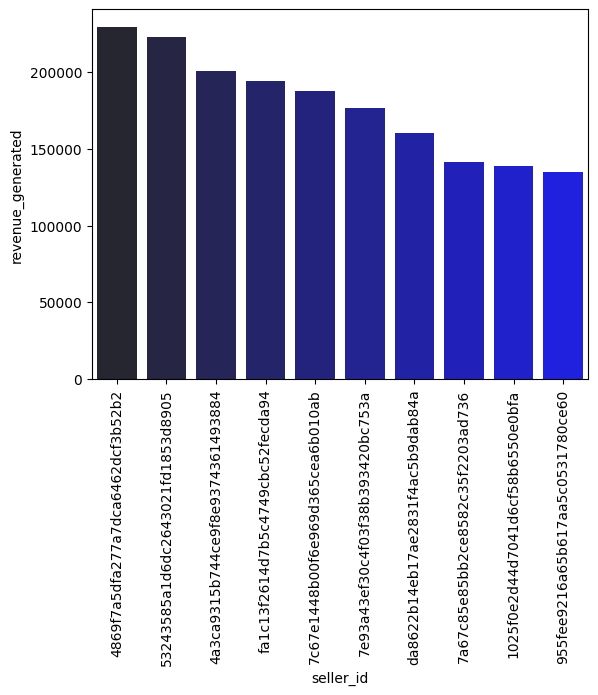

In [2]:
query="""select sellers.seller_id,round(sum(order_items.price),2) revenue
from sellers join order_items
on sellers.seller_id=order_items.seller_id
group by  sellers.seller_id order by revenue desc """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["seller_id","revenue_generated"])
df=df.head(10)

sns.barplot(x='seller_id',y='revenue_generated',data=df,hue='seller_id',color='blue')

plt.xticks(rotation=90)

plt.show


# calculate the moving average of order values for each customer over their order history

In [6]:
query="""select customer_id,order_purchase_timestamp,payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg from

(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders 
on payments.order_id=orders.order_id) as a"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=["customer_id","puchase_timestamp","price","mov_avg"])
df.head(10)

,customer_id,puchase_timestamp,price,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
5,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
6,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
7,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
8,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
9,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006


# calculate the cumulative sales per month for each year

In [7]:
query="""select years, months,pay,
sum(pay) over(order by years,months) as cum_sum
from

(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) pay from orders join payments
on orders.order_id=payments.order_id
group by years,months order by years, months) as a"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,756.72,756.72
1,2016,10,177271.44,178028.16
2,2016,12,58.86,178087.02
3,2017,1,415464.12,593551.14
4,2017,2,875724.03,1469275.17
5,2017,3,1349590.80,2818865.97
6,2017,4,1253364.09,4072230.06
7,2017,5,1778756.46,5850986.52
8,2017,6,1533829.14,7384815.66
9,2017,7,1777148.76,9161964.42


# calculate year over year growth rate

<function matplotlib.pyplot.show(close=None, block=None)>

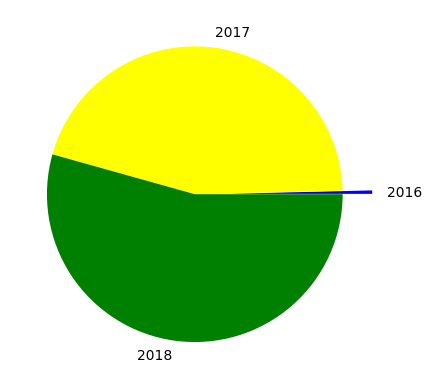

In [3]:
query="""(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2)  revenue from
orders join payments 
on orders.order_id=payments.order_id group by years order by years)
"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=["year","growth"])
df
ex=[0.2,0,0]
color=["blue","yellow","green"]
plt.pie(df.growth,labels=df.year,explode=ex,colors=color)
plt.show

# calculate the retention rate of customers defined as percentage of customers who make another purchase within 6 months of their first purchase

In [29]:
query= """with a as(select customers.customer_id,
min(orders.order_purchase_timestamp) first_order from
customers join orders 
on customers.customer_id=orders.customer_id
group by customers.customer_id)

select a.customer_id, count(distinct orders.order_purchase_timestamp)
from a join orders
on a.customer_id= orders.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order, interval 6 month)
group by a.customer_id
"""
cur.execute(query)
data=cur.fetchall()
data
#since customers did not repeat purchase value is null

[]

# identify the top 3 customers who spent the most money each year


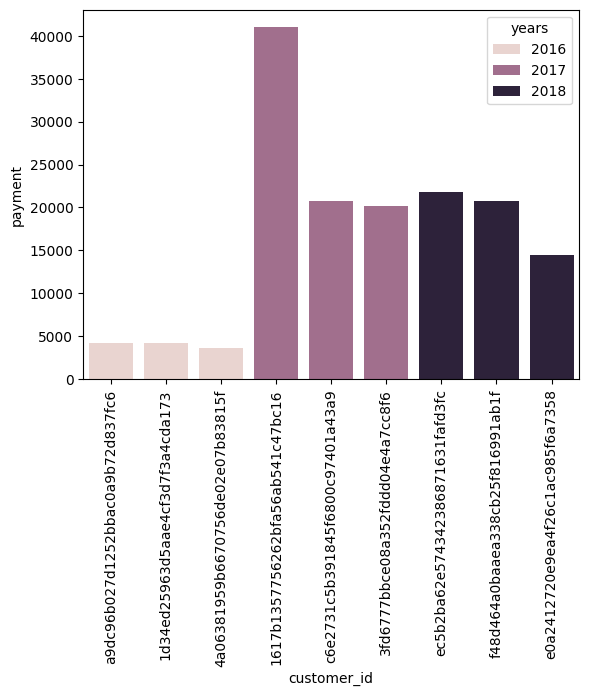

In [16]:
query="""select years, customer_id, payment, ranks 
from
(select  year(orders.order_Purchase_timestamp) years,
 orders.customer_id, sum(payments.payment_value) payment,
 dense_rank() over( partition by year(orders.order_Purchase_timestamp) order by sum(payments.payment_value) desc) ranks
from orders join payments
on payments.order_id=orders.order_id
group by year(orders.order_Purchase_timestamp), orders.customer_id) as a
where  ranks <= 3; 
"""
cur.execute(query)
data=cur.fetchall()
df= pd.DataFrame(data,columns=["years","customer_id","payment","rank"])
sns.barplot(x="customer_id",y="payment",data=df, hue="years")
plt.xticks(rotation=90)
plt.show()